# Assignment A4-1 Estimate the need of parking places in the city

-Made some small changes to the excel file - use from my data folder


## Step 1: Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

## Step 2: Data

In [2]:
# read the data
df = pd.read_excel("./data/parking-estimation2.xlsx")

In [3]:
df

,City,Number_of_weekly_riders,Price_per_week,Population_of_city,Monthly_income_of_riders,Average_parking_rates_per_month
0,1,192000.000000,15.000000,1800000.0,5800.0,50.0
1,2,190400.000000,15.000000,1790000.0,6200.0,50.0
2,3,191200.000000,15.000000,1780000.0,6400.0,60.0
3,4,177600.000000,25.000000,1778000.0,6500.0,60.0
4,5,176800.000000,25.000000,1750000.0,6550.0,60.0
5,6,178400.000000,25.000000,1740000.0,6580.0,70.0
6,7,180800.000000,25.000000,1725000.0,8200.0,75.0
7,8,175200.000000,30.000000,1725000.0,8600.0,75.0
8,9,174400.000000,30.000000,1720000.0,8800.0,75.0
9,10,173920.000000,30.000000,1705000.0,9200.0,80.0


In [4]:
# get idea of the look
df.head()

,City,Number_of_weekly_riders,Price_per_week,Population_of_city,Monthly_income_of_riders,Average_parking_rates_per_month
0,1,192000.0,15.0,1800000.0,5800.0,50.0
1,2,190400.0,15.0,1790000.0,6200.0,50.0
2,3,191200.0,15.0,1780000.0,6400.0,60.0
3,4,177600.0,25.0,1778000.0,6500.0,60.0
4,5,176800.0,25.0,1750000.0,6550.0,60.0


In [5]:
df.tail()

,City,Number_of_weekly_riders,Price_per_week,Population_of_city,Monthly_income_of_riders,Average_parking_rates_per_month
23,24,123888.000000,98.000000,1595000.0,15200.0,175.0
24,25,126080.000000,87.000000,1590000.0,15600.0,175.0
25,26,151680.000000,77.000000,1600000.0,16000.0,190.0
26,27,152800.000000,63.000000,1610000.0,16200.0,200.0
27,average,160026.074074,49.925926,NaN,NaN,NaN


In [6]:
# drop the last row with null values
df = df[:-1]
df.tail()

,City,Number_of_weekly_riders,Price_per_week,Population_of_city,Monthly_income_of_riders,Average_parking_rates_per_month
22,23,126240.0,86.0,1590000.0,15000.0,165.0
23,24,123888.0,98.0,1595000.0,15200.0,175.0
24,25,126080.0,87.0,1590000.0,15600.0,175.0
25,26,151680.0,77.0,1600000.0,16000.0,190.0
26,27,152800.0,63.0,1610000.0,16200.0,200.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             27 non-null     object 
 1   Number_of_weekly_riders          27 non-null     float64
 2   Price_per_week                   27 non-null     float64
 3   Population_of_city               27 non-null     float64
 4   Monthly_income_of_riders         27 non-null     float64
 5   Average_parking_rates_per_month  27 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.4+ KB


In [8]:
df.describe()

,Number_of_weekly_riders,Price_per_week,Population_of_city,Monthly_income_of_riders,Average_parking_rates_per_month
count,27.000000,27.000000,2.700000e+01,27.000000,27.000000
mean,160026.074074,49.925926,1.680111e+06,11063.259259,107.037037
std,21301.097303,27.627921,6.780307e+04,3416.627944,45.346089
min,115696.000000,15.000000,1.590000e+06,5800.000000,50.000000
25%,149600.000000,27.500000,1.617500e+06,8400.000000,75.000000
50%,161600.000000,40.000000,1.695000e+06,11600.000000,100.000000
75%,176000.000000,75.000000,1.725000e+06,13888.000000,140.000000
max,192000.000000,102.000000,1.800000e+06,16200.000000,200.000000


In [9]:
# see which are the attribute labels
list(df)

['City ',
 'Number_of_weekly_riders',
 'Price_per_week',
 'Population_of_city',
 'Monthly_income_of_riders',
 'Average_parking_rates_per_month']

In [10]:
# get idea of columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             27 non-null     object 
 1   Number_of_weekly_riders          27 non-null     float64
 2   Price_per_week                   27 non-null     float64
 3   Population_of_city               27 non-null     float64
 4   Monthly_income_of_riders         27 non-null     float64
 5   Average_parking_rates_per_month  27 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.4+ KB


In [11]:
# get idea of basic statistical parameters for each column
df.describe()

,Number_of_weekly_riders,Price_per_week,Population_of_city,Monthly_income_of_riders,Average_parking_rates_per_month
count,27.000000,27.000000,2.700000e+01,27.000000,27.000000
mean,160026.074074,49.925926,1.680111e+06,11063.259259,107.037037
std,21301.097303,27.627921,6.780307e+04,3416.627944,45.346089
min,115696.000000,15.000000,1.590000e+06,5800.000000,50.000000
25%,149600.000000,27.500000,1.617500e+06,8400.000000,75.000000
50%,161600.000000,40.000000,1.695000e+06,11600.000000,100.000000
75%,176000.000000,75.000000,1.725000e+06,13888.000000,140.000000
max,192000.000000,102.000000,1.800000e+06,16200.000000,200.000000


In [12]:
# to check null values in data
df.isnull().sum()

City                               0
Number_of_weekly_riders            0
Price_per_week                     0
Population_of_city                 0
Monthly_income_of_riders           0
Average_parking_rates_per_month    0
dtype: int64

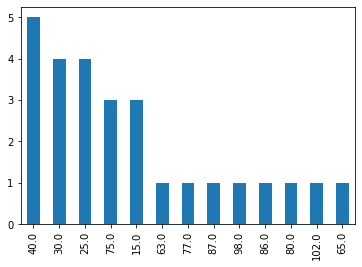

In [13]:
df['Price_per_week'].value_counts().plot(kind='bar')

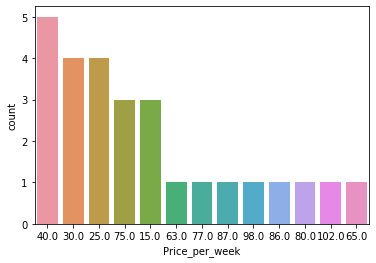

In [14]:
# same, with anmother plot lib
sns.countplot(df.Price_per_week, order = df['Price_per_week'].value_counts().index)

In [15]:
# to avoid scientific notation, e.g. e+04
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [16]:
df.describe()

,Number_of_weekly_riders,Price_per_week,Population_of_city,Monthly_income_of_riders,Average_parking_rates_per_month
count,27.00,27.00,27.00,27.00,27.00
mean,160026.07,49.93,1680111.11,11063.26,107.04
std,21301.10,27.63,67803.07,3416.63,45.35
min,115696.00,15.00,1590000.00,5800.00,50.00
25%,149600.00,27.50,1617500.00,8400.00,75.00
50%,161600.00,40.00,1695000.00,11600.00,100.00
75%,176000.00,75.00,1725000.00,13888.00,140.00
max,192000.00,102.00,1800000.00,16200.00,200.00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             27 non-null     object 
 1   Number_of_weekly_riders          27 non-null     float64
 2   Price_per_week                   27 non-null     float64
 3   Population_of_city               27 non-null     float64
 4   Monthly_income_of_riders         27 non-null     float64
 5   Average_parking_rates_per_month  27 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.4+ KB


## Step 3: Train a Model

## 3.1 Linear Regression

In [18]:
# split the set into subsets for training and testing
train_data, test_data = train_test_split(df, train_size =0.8, random_state = 3)

In [19]:
train_data

,City,Number_of_weekly_riders,Price_per_week,Population_of_city,Monthly_income_of_riders,Average_parking_rates_per_month
13,14,161600.00,40.00,1695000.00,11600.00,100.00
2,3,191200.00,15.00,1780000.00,6400.00,60.00
1,2,190400.00,15.00,1790000.00,6200.00,50.00
23,24,123888.00,98.00,1595000.00,15200.00,175.00
14,15,160800.00,40.00,1690000.00,11800.00,105.00
4,5,176800.00,25.00,1750000.00,6550.00,60.00
22,23,126240.00,86.00,1590000.00,15000.00,165.00
6,7,180800.00,25.00,1725000.00,8200.00,75.00
7,8,175200.00,30.00,1725000.00,8600.00,75.00
5,6,178400.00,25.00,1740000.00,6580.00,70.00


In [20]:
test_data

,City,Number_of_weekly_riders,Price_per_week,Population_of_city,Monthly_income_of_riders,Average_parking_rates_per_month
18,19,147200.00,75.00,1630000.00,13224.00,125.00
17,18,115696.00,102.00,1635000.00,13000.00,110.00
12,13,161600.00,40.00,1695000.00,11330.00,85.00
25,26,151680.00,77.00,1600000.00,16000.00,190.00
15,16,159200.00,40.00,1630000.00,11830.00,105.00
16,17,148800.00,65.00,1640000.00,12650.00,105.00


In [21]:
X_train = np.array(train_data['Number_of_weekly_riders']).reshape(-1,1)
y_train = np.array(train_data['Average_parking_rates_per_month']).reshape(-1, 1)
X_test = np.array(test_data['Number_of_weekly_riders']).reshape(-1,1)
y_test = np.array(test_data['Average_parking_rates_per_month']).reshape(-1, 1)

In [22]:
y_train

array([[100.],
       [ 60.],
       [ 50.],
       [175.],
       [105.],
       [ 60.],
       [165.],
       [ 75.],
       [ 75.],
       [ 70.],
       [150.],
       [ 80.],
       [ 80.],
       [200.],
       [130.],
       [155.],
       [ 50.],
       [ 75.],
       [ 60.],
       [175.],
       [ 80.]])

In [23]:
# Create regressor
regressor = linear_model.LinearRegression()

In [24]:
# Train model
model = regressor.fit(X_train, y_train)

In [25]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 4: Test the Model

In [26]:
# make prediction
y_predicted = regressor.predict(X_test)

In [27]:
y_predicted

array([[136.56657014],
       [200.23524961],
       [107.46458359],
       [127.51261877],
       [112.31491469],
       [133.33301608]])

In [28]:
y_test

array([[125.],
       [110.],
       [ 85.],
       [190.],
       [105.],
       [105.]])

No handles with labels found to put in legend.


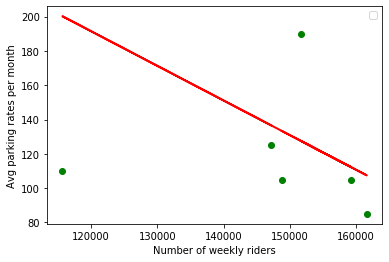

In [29]:
# plot the prediction
plt.xlabel('Number of weekly riders')
plt.ylabel('Avg parking rates per month')
plt.legend()

plt.scatter(X_test[:,0], y_test, color='green', label = 'test data')
plt.plot(X_test[:,0], y_predicted, color='red', linewidth=2, label= 'predicted regression line')

# y_predicted, X_test, 
plt.show()

In [30]:
# Compute the coeficients a and b
# so the formula would be y = ax + b
a = regressor.coef_
b = regressor.intercept_
print('Coefficient a: ', a)
print('Intercept b: ', b)

Coefficient a:  [[-0.00202097]]
Intercept b:  [434.05354378]


In [31]:
# Compute performance metrics
print("Linear Regressor Performance")

# The mean squared error
print("Mean squared error: %.2f" % sm.mean_squared_error(y_test, y_predicted))

# Explained variance score: 1 is perfect prediction
print('Explained variance score ', round(sm.explained_variance_score(y_test, y_predicted), 2))
print('R-squared (training) ', round(regressor.score(X_train, y_train), 2))
print('R-squared (testing) ',  round(regressor.score(X_test, y_test), 2))
print('R2 score: %.2f' % sm.r2_score(y_test, y_predicted))

Linear Regressor Performance
Mean squared error: 2256.96
Explained variance score  -0.79
R-squared (training)  0.83
R-squared (testing)  -1.02
R2 score: -1.02


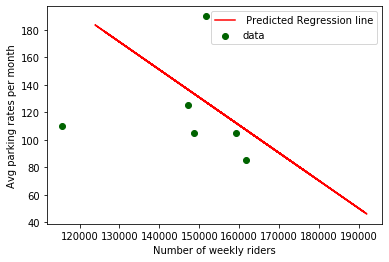

In [32]:
plt.scatter(X_test[:,0], y_test, color= 'darkgreen', label = 'data')
plt.plot(X_train[:,0], regressor.predict(X_train), color='red', label= ' Predicted Regression line')
plt.xlabel('Number of weekly riders')
plt.ylabel('Avg parking rates per month')
plt.legend()

## 3.2 Multiple Regression
This is a linear regression, where more input features participate.<br>
_y = c + a1 x X1 + a2 x X2 + a3 x X3 + a4 x X4 + a5 x X5 + a6 x X6_

In [33]:
# select features
features1 = ['Number_of_weekly_riders','Population_of_city','Average_parking_rates_per_month']
regressor1 = linear_model.LinearRegression()

In [34]:
regressor1.fit(train_data[features1],train_data['Average_parking_rates_per_month'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_prediction = regressor1.predict(test_data[features1])

In [36]:
# Compute performance metrics
print("Multiple Regression Performance")

# The coefficients
print('Coefficients ai (one for each input variable/feature): ', regressor1.coef_)
print('Intercept c: ', regressor1.intercept_)

Multiple Regression Performance
Coefficients ai (one for each input variable/feature):  [-1.61129761e-15  4.65722807e-16  1.00000000e+00]
Intercept c:  -5.243805389909539e-10


In [37]:
# The mean squared error
print("Mean squared error: %.2f" % sm.mean_squared_error(y_test, y_prediction))

# Explained variance score: 1 is perfect prediction
print('R-squared (training) ', round(regressor1.score(train_data[features1], train_data['Average_parking_rates_per_month']), 3))
print('R-squared (testing) ', round(regressor1.score(test_data[features1], test_data['Average_parking_rates_per_month']), 3))
print('Explained variance score ', round(sm.explained_variance_score(y_test, y_prediction), 2))
print('R2 score: %.2f' % sm.r2_score(y_test, y_prediction))

Mean squared error: 0.00
R-squared (training)  1.0
R-squared (testing)  1.0
Explained variance score  1.0
R2 score: 1.00


## 3.3 Polynomial Regression 
_y = a + b1 x X + b2 x X^2 + ... + bn x X^n_

In [38]:
y_train_poly = np.array(train_data['Average_parking_rates_per_month']).reshape(-1, 1)

In [39]:
# We chose the living space in sqm as an input and price as an output
# reshape(-1,1) reshapes the column in one-dimensional array (1 column) and unknown number of rows (-1)
X_train = np.array(train_data['Number_of_weekly_riders']).reshape(-1,1)
y_train = np.array(train_data['Average_parking_rates_per_month']).reshape(-1, 1)
X_test = np.array(test_data['Number_of_weekly_riders']).reshape(-1,1)
y_test = np.array(test_data['Average_parking_rates_per_month']).reshape(-1, 1)

In [40]:
# polynimial regressi0n transforms the features of X from [x_1, x_2]
# to [1, x_1, x_2, x_1^2, x_1 x_2, x_2^2] 
# so now they can be used in a linear regression model
# features2 = ['sqm','waterfront','yr_built']
features2 = 'Number_of_weekly_riders'
train_data_feature = train_data[features2].values.reshape(-1,1)
test_data_feature = test_data[features2].values.reshape(-1,1)
#y_train_data_reshaped = y_train.values.reshape(-1,1)
# train_data['price']

In [41]:
from sklearn.preprocessing import PolynomialFeatures
def polynomial_regression_model(degree):
    
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  X_test_poly =  poly_features.fit_transform(X_test)
  
  # fit the transformed features to Linear Regression
  model = linear_model.LinearRegression()
  poly_model = model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predicted = poly_model.predict(X_test_poly)

In [42]:
# execute
polynomial_regression_model(2)

In [43]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(train_data_feature)
X_test_poly = poly.fit_transform(test_data_feature)
y_train_poly = np.array(train_data['Average_parking_rates_per_month']).reshape(-1, 1)
y_test_poly = np.array(test_data['Average_parking_rates_per_month']).reshape(-1, 1)
#poly.fit(X_train_poly, train_data['price'].values.reshape(-1,1))
# poly.fit(X_train_poly, y_train)

In [44]:
# use linear regression
model = linear_model.LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# linear prediction with poly fit data
y_train_predicted = model.predict(X_train_poly)
y_test_predicted = model.predict(X_test_poly)  

In [46]:
# y_train_predicted
y_test_predicted

array([[139.0372616 ],
       [191.78620865],
       [110.52223044],
       [130.46202812],
       [115.4666269 ],
       [136.00538082]])

In [47]:
# RMSE (Root mean squared error) answers the question: "How similar, on average, are the numbers in list1 to list2?"  
# evaluating the model on training dataset
rmse_train = np.sqrt(sm.mean_squared_error(y_train, y_train_predicted))
r2_train = sm.r2_score(y_train, y_train_predicted)
  
# evaluating the model on test dataset
rmse_test = np.sqrt(sm.mean_squared_error(y_test, y_test_predicted))
r2_test = sm.r2_score(y_test, y_test_predicted)

In [48]:
# print the measures - positive?
print('RMSE (training) ',rmse_train)
print('RMSE (testing) ',rmse_test)

RMSE (training)  19.216126483914028
RMSE (testing)  45.005679082883326


In [49]:
# Compute other performance metrics
print("Multiple Regression Performance")

# The coefficients
print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

# Explained variance score: 1 is perfect prediction
print('R-squared (training) ', round(r2_train, 3))
print('R-squared (testing) ', round(r2_test, 3))

Multiple Regression Performance
Coefficient:  [[ 0.00000000e+00  7.72903634e-05 -6.66289139e-09]]
Intercept:  [272.03058463]
R-squared (training)  0.829
R-squared (testing)  -0.814


In [50]:
# compare 
print('Explained variance score ', round(sm.explained_variance_score(y_train, y_train_predicted), 3))
print('Explained variance score ', round(sm.explained_variance_score(y_test, y_test_predicted), 3))

Explained variance score  0.829
Explained variance score  -0.549


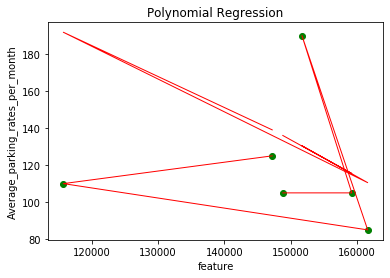

In [51]:
# Plot
plt.title('Polynomial Regression') 
plt.xlabel('feature')
plt.ylabel('Average_parking_rates_per_month')
plt.scatter(test_data_feature, y_test,  color = 'green', label = 'test data') 
  
#plt.plot(X_plot_poly,model.predict(X_plot_poly),'-r')
plt.plot(test_data_feature, y_test_poly, '-r', color='red', linewidth=1)
plt.plot(test_data_feature, y_test_predicted, '-r', color='red', linewidth=1)
plt.show()